# **Dataset Load**

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('india corona data.csv')

In [ ]:
df.head()

,date,new_case,death
0,9/27/2020,88600,1124
1,9/28/2020,82170,1039
2,9/29/2020,70589,776
3,9/30/2020,80472,1179
4,10/1/2020,86821,1181


In [ ]:
df.tail()

,date,new_case,death
405,11/6/2021,10929,392
406,11/7/2021,10826,526
407,11/8/2021,11478,266
408,11/9/2021,10126,332
409,11/10/2021,11466,460


In [ ]:
df1=df.reset_index()['new_case']

In [ ]:
df1

0      88600
1      82170
2      70589
3      80472
4      86821
       ...  
405    10929
406    10826
407    11478
408    10126
409    11466
Name: new_case, Length: 410, dtype: int64

Text(0, 0.5, 'Confirmed Cases')

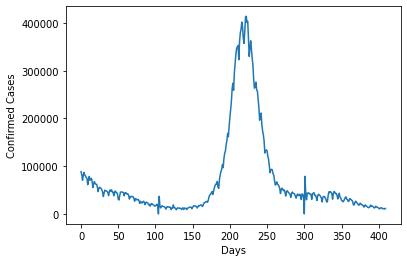

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)
plt.xlabel('Days')
plt.ylabel('Confirmed Cases')

# **Data Preprocessing**

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[0.21391252]
 [0.19838817]
 [0.17042744]
 [0.19428858]
 [0.20961737]
 [0.19673192]
 [0.19188388]
 [0.1830787 ]
 [0.17972998]
 [0.14792075]
 [0.17395241]
 [0.18958541]
 [0.1702029 ]
 [0.17690517]
 [0.17958753]
 [0.16111524]
 [0.13361565]
 [0.15333375]
 [0.16347166]
 [0.15300057]
 [0.15020232]
 [0.14937903]
 [0.13453311]
 [0.11296802]
 [0.13048181]
 [0.13481559]
 [0.13125923]
 [0.12885453]
 [0.12102958]
 [0.10900364]
 [0.0880518 ]
 [0.10597362]
 [0.12043082]
 [0.11745391]
 [0.11653645]
 [0.11338571]
 [0.10920403]
 [0.09249423]
 [0.11167151]
 [0.12122514]
 [0.1150154 ]
 [0.12157764]
 [0.1102736 ]
 [0.11082648]
 [0.09192203]
 [0.10691039]
 [0.11566004]
 [0.10835418]
 [0.10788338]
 [0.0992303 ]
 [0.07375395]
 [0.07041006]
 [0.09323544]
 [0.11003699]
 [0.11077578]
 [0.11162081]
 [0.10915092]
 [0.1063744 ]
 [0.09168542]
 [0.10713975]
 [0.10741258]
 [0.10401557]
 [0.09976629]
 [0.1009445 ]
 [0.09360967]
 [0.07513013]
 [0.08837533]
 [0.085833  ]
 [0.0883536 ]
 [0.08849122]
 [0.08694361]
 [0.07

Text(0, 0.5, 'Confirmed Cases')

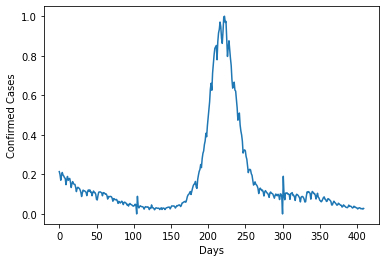

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)
plt.xlabel('Days')
plt.ylabel('Confirmed Cases')

In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(266, 144)

In [ ]:
train_data

array([[0.21391252],
       [0.19838817],
       [0.17042744],
       [0.19428858],
       [0.20961737],
       [0.19673192],
       [0.19188388],
       [0.1830787 ],
       [0.17972998],
       [0.14792075],
       [0.17395241],
       [0.18958541],
       [0.1702029 ],
       [0.17690517],
       [0.17958753],
       [0.16111524],
       [0.13361565],
       [0.15333375],
       [0.16347166],
       [0.15300057],
       [0.15020232],
       [0.14937903],
       [0.13453311],
       [0.11296802],
       [0.13048181],
       [0.13481559],
       [0.13125923],
       [0.12885453],
       [0.12102958],
       [0.10900364],
       [0.0880518 ],
       [0.10597362],
       [0.12043082],
       [0.11745391],
       [0.11653645],
       [0.11338571],
       [0.10920403],
       [0.09249423],
       [0.11167151],
       [0.12122514],
       [0.1150154 ],
       [0.12157764],
       [0.1102736 ],
       [0.11082648],
       [0.09192203],
       [0.10691039],
       [0.11566004],
       [0.108

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(255, 10)
(255,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(133, 10)
(133,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# **Stacked LSTM**

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
8/8 [==============================] - 12s 280ms/step - loss: 0.0764 - val_loss: 0.0199
Epoch 2/100
8/8 [==============================] - 0s 26ms/step - loss: 0.0372 - val_loss: 0.0091
Epoch 3/100
8/8 [==============================] - 0s 26ms/step - loss: 0.0147 - val_loss: 3.7168e-04
Epoch 4/100
8/8 [==============================] - 0s 26ms/step - loss: 0.0113 - val_loss: 4.9217e-04
Epoch 5/100
8/8 [==============================] - 0s 25ms/step - loss: 0.0094 - val_loss: 8.3918e-04
Epoch 6/100
8/8 [==============================] - 0s 25ms/step - loss: 0.0091 - val_loss: 0.0019
Epoch 7/100
8/8 [==============================] - 0s 26ms/step - loss: 0.0087 - val_loss: 4.6384e-04
Epoch 8/100
8/8 [==============================] - 0s 26ms/step - loss: 0.0087 - val_loss: 3.4667e-04
Epoch 9/100
8/8 [==============================] - 0s 26ms/step - loss: 0.0084 - val_loss: 5.0974e-04
Epoch 10/100
8/8 [==============================] - 0s 26ms/step - loss: 0.0082 - val_loss: 

# **Prediction**

In [ ]:
import tensorflow as tf

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

# **Performence Matrix**

## **MSE**

In [ ]:
import math
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,train_predict)

20945871291.87916

In [ ]:
### Test Data RMSE
mean_squared_error(ytest,test_predict)

1261700163.6606643

## **RMSE**

In [ ]:
### Calculate RMSE performance metrics
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

144726.8851730015

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

35520.41896797762

## **MAE**

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_train,train_predict)

92947.89268844793

In [ ]:
### Test Data MAE
mean_absolute_error(ytest,test_predict)

33368.27290808932

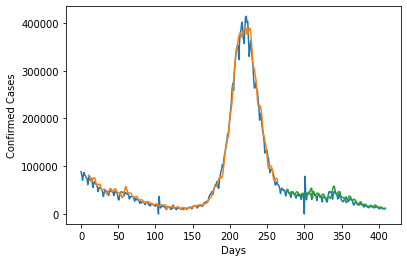

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=10
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.xlabel('Days')
plt.ylabel('Confirmed Cases')
plt.show()

In [ ]:
len(test_data)

144

In [ ]:
x_input=test_data[134:].reshape(1,-1)
x_input.shape


(1, 10)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
len(temp_input)

10

In [ ]:
temp_input

[0.030213333075801325,
 0.025164900962847788,
 0.028738157551643214,
 0.031109061585560177,
 0.03073242102620066,
 0.026386568418206222,
 0.026137889074526542,
 0.027712053463644526,
 0.024447835282528706,
 0.027683081112924564]

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=10
i=0
while(i<30):
    
    if(len(temp_input)>10):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.02966322]
11
1 day input [0.0251649  0.02873816 0.03110906 0.03073242 0.02638657 0.02613789
 0.02771205 0.02444784 0.02768308 0.02966322]
1 day output [[0.02963892]]
2 day input [0.02873816 0.03110906 0.03073242 0.02638657 0.02613789 0.02771205
 0.02444784 0.02768308 0.02966322 0.02963892]
2 day output [[0.02763037]]
3 day input [0.03110906 0.03073242 0.02638657 0.02613789 0.02771205 0.02444784
 0.02768308 0.02966322 0.02963892 0.02763037]
3 day output [[0.02755929]]
4 day input [0.03073242 0.02638657 0.02613789 0.02771205 0.02444784 0.02768308
 0.02966322 0.02963892 0.02763037 0.02755929]
4 day output [[0.0292924]]
5 day input [0.02638657 0.02613789 0.02771205 0.02444784 0.02768308 0.02966322
 0.02963892 0.02763037 0.02755929 0.0292924 ]
5 day output [[0.03156676]]
6 day input [0.02613789 0.02771205 0.02444784 0.02768308 0.02966322 0.02963892
 0.02763037 0.02755929 0.0292924  0.03156676]
6 day output [[0.03218964]]
7 day input [0.02771205 0.02444784 0.02768308 0.02966322 0.02963892

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

410

In [ ]:
len(lst_output)

30

Text(0, 0.5, 'Confirmed Cases')

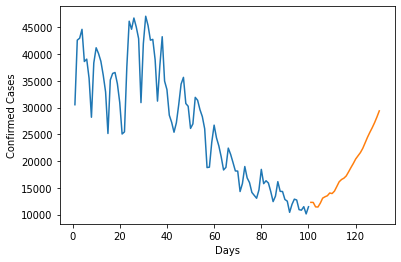

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[310:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.xlabel('Days')
plt.ylabel('Confirmed Cases')

Text(0, 0.5, 'Confirmed Cases')

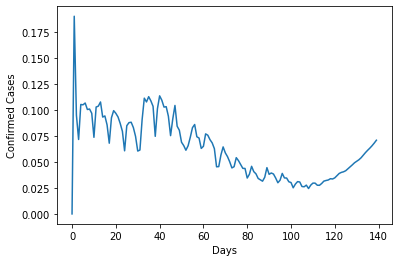

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[300:])
plt.xlabel('Days')
plt.ylabel('Confirmed Cases')

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

Text(0, 0.5, 'Confirmed Cases')

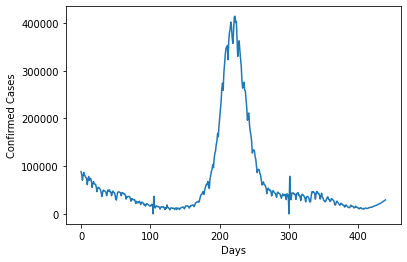

In [ ]:
plt.plot(df3)
plt.xlabel('Days')
plt.ylabel('Confirmed Cases')

# **Bidirectional LSTM**

In [ ]:
from keras.layers import Bidirectional
model2 = Sequential()
model2.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(10,1)))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 100)              20800     
 l)                                                              
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 20,901
Trainable params: 20,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
8/8 [==============================] - 3s 125ms/step - loss: 0.0891 - val_loss: 0.0012
Epoch 2/100
8/8 [==============================] - 1s 66ms/step - loss: 0.0508 - val_loss: 0.0012
Epoch 3/100
8/8 [==============================] - 1s 74ms/step - loss: 0.0257 - val_loss: 0.0071
Epoch 4/100
8/8 [==============================] - 1s 82ms/step - loss: 0.0134 - val_loss: 0.0123
Epoch 5/100
8/8 [==============================] - 1s 66ms/step - loss: 0.0107 - val_loss: 0.0056
Epoch 6/100
8/8 [==============================] - 0s 62ms/step - loss: 0.0066 - val_loss: 0.0013
Epoch 7/100
8/8 [==============================] - 1s 69ms/step - loss: 0.0054 - val_loss: 4.1929e-04
Epoch 8/100
8/8 [==============================] - 1s 86ms/step - loss: 0.0048 - val_loss: 3.1658e-04
Epoch 9/100
8/8 [==============================] - 1s 81ms/step - loss: 0.0047 - val_loss: 3.3955e-04
Epoch 10/100
8/8 [==============================] - 1s 77ms/step - loss: 0.0045 - val_loss: 3.8328e-04
Ep

In [ ]:
train_predict=model2.predict(X_train)
test_predict=model2.predict(X_test)

In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

# **Performence Matrix**

## **MSE**

In [ ]:
mean_squared_error(y_train,train_predict)

21137038272.829105

In [ ]:
### Test Data RMSE
mean_squared_error(ytest,test_predict)

1388884753.5570335

## **RMSE**

In [ ]:
### Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train,train_predict))

145385.8255567891

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

37267.74414365637

## **MAE**

In [ ]:
mean_absolute_error(y_train,train_predict)

95296.35073838665

In [ ]:
### Test Data MAE
mean_absolute_error(ytest,test_predict)

35788.62621812221

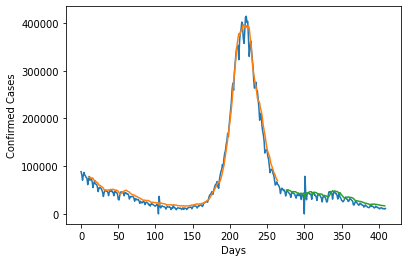

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=10
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.xlabel('Days')
plt.ylabel('Confirmed Cases')
plt.show()

In [ ]:
x_input=test_data[134:].reshape(1,-1)
x_input.shape

(1, 10)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=10
i=0
while(i<30):
    
    if(len(temp_input)>10):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model2.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model2.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.04034822]
11
1 day input [0.0251649  0.02873816 0.03110906 0.03073242 0.02638657 0.02613789
 0.02771205 0.02444784 0.02768308 0.04034822]
1 day output [[0.04292107]]
2 day input [0.02873816 0.03110906 0.03073242 0.02638657 0.02613789 0.02771205
 0.02444784 0.02768308 0.04034822 0.04292107]
2 day output [[0.0455535]]
3 day input [0.03110906 0.03073242 0.02638657 0.02613789 0.02771205 0.02444784
 0.02768308 0.04034822 0.04292107 0.0455535 ]
3 day output [[0.04884038]]
4 day input [0.03073242 0.02638657 0.02613789 0.02771205 0.02444784 0.02768308
 0.04034822 0.04292107 0.0455535  0.04884038]
4 day output [[0.05272193]]
5 day input [0.02638657 0.02613789 0.02771205 0.02444784 0.02768308 0.04034822
 0.04292107 0.0455535  0.04884038 0.05272193]
5 day output [[0.05691379]]
6 day input [0.02613789 0.02771205 0.02444784 0.02768308 0.04034822 0.04292107
 0.0455535  0.04884038 0.05272193 0.05691379]
6 day output [[0.06111928]]
7 day input [0.02771205 0.02444784 0.02768308 0.04034822 0.04292107

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

Text(0, 0.5, 'Confirmed Cases')

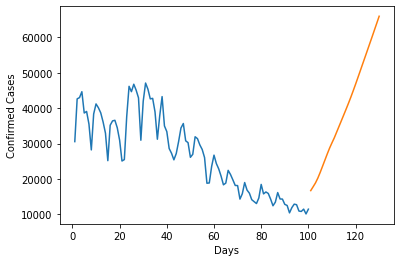

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[310:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.xlabel('Days')
plt.ylabel('Confirmed Cases')

Text(0, 0.5, 'Confirmed Cases')

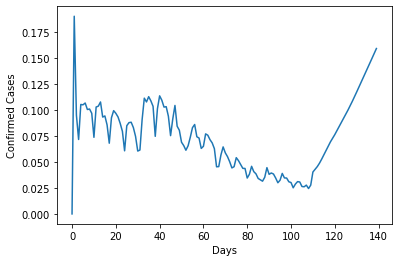

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[300:])
plt.xlabel('Days')
plt.ylabel('Confirmed Cases')

Text(0, 0.5, 'Confirmed Cases')

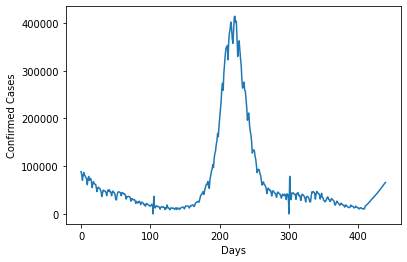

In [ ]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)
plt.xlabel('Days')
plt.ylabel('Confirmed Cases')

# **Vanilla LSTM**

In [ ]:
model3 = Sequential()
model3.add(LSTM(50, activation='relu', input_shape=(10, 1)))
model3.add(Dense(1))
model3.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 50)                10400     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model3.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
8/8 [==============================] - 2s 68ms/step - loss: 0.0998 - val_loss: 0.0018
Epoch 2/100
8/8 [==============================] - 0s 39ms/step - loss: 0.0712 - val_loss: 7.1864e-04
Epoch 3/100
8/8 [==============================] - 0s 35ms/step - loss: 0.0451 - val_loss: 0.0032
Epoch 4/100
8/8 [==============================] - 0s 33ms/step - loss: 0.0270 - val_loss: 0.0089
Epoch 5/100
8/8 [==============================] - 0s 34ms/step - loss: 0.0159 - val_loss: 0.0109
Epoch 6/100
8/8 [==============================] - 0s 40ms/step - loss: 0.0101 - val_loss: 0.0049
Epoch 7/100
8/8 [==============================] - 0s 34ms/step - loss: 0.0060 - val_loss: 7.2210e-04
Epoch 8/100
8/8 [==============================] - 0s 36ms/step - loss: 0.0047 - val_loss: 3.7294e-04
Epoch 9/100
8/8 [==============================] - 0s 34ms/step - loss: 0.0047 - val_loss: 3.2081e-04
Epoch 10/100
8/8 [==============================] - 0s 39ms/step - loss: 0.0044 - val_loss: 3.2926e-04

# **Prediction**

In [ ]:
train_predict=model3.predict(X_train)
test_predict=model3.predict(X_test)
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

# **Performence Matrix**

## **MSE**

In [ ]:
mean_squared_error(y_train,train_predict)

20652855855.901485

In [ ]:
### Test Data RMSE
mean_squared_error(ytest,test_predict)

1314373009.5405548

## **RMSE**

In [ ]:
### Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train,train_predict))

143711.01508200922

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

36254.28263723549

## **MAE**

In [ ]:
mean_absolute_error(y_train,train_predict)

93724.9929833315

In [ ]:
### Test Data MAE
mean_absolute_error(ytest,test_predict)

34612.11483713067

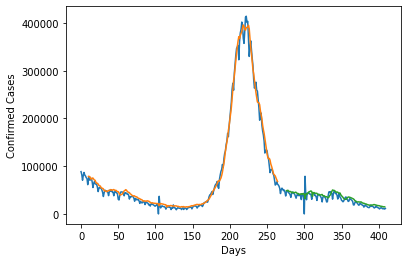

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=10
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.xlabel('Days')
plt.ylabel('Confirmed Cases')
plt.show()

In [ ]:
x_input=test_data[134:].reshape(1,-1)
x_input.shape

(1, 10)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=10
i=0
while(i<30):
    
    if(len(temp_input)>10):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model3.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model3.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.03555048]
11
1 day input [0.0251649  0.02873816 0.03110906 0.03073242 0.02638657 0.02613789
 0.02771205 0.02444784 0.02768308 0.03555048]
1 day output [[0.03731896]]
2 day input [0.02873816 0.03110906 0.03073242 0.02638657 0.02613789 0.02771205
 0.02444784 0.02768308 0.03555048 0.03731896]
2 day output [[0.03899707]]
3 day input [0.03110906 0.03073242 0.02638657 0.02613789 0.02771205 0.02444784
 0.02768308 0.03555048 0.03731896 0.03899707]
3 day output [[0.04160474]]
4 day input [0.03073242 0.02638657 0.02613789 0.02771205 0.02444784 0.02768308
 0.03555048 0.03731896 0.03899707 0.04160474]
4 day output [[0.04509586]]
5 day input [0.02638657 0.02613789 0.02771205 0.02444784 0.02768308 0.03555048
 0.03731896 0.03899707 0.04160474 0.04509586]
5 day output [[0.04920647]]
6 day input [0.02613789 0.02771205 0.02444784 0.02768308 0.03555048 0.03731896
 0.03899707 0.04160474 0.04509586 0.04920647]
6 day output [[0.0532243]]
7 day input [0.02771205 0.02444784 0.02768308 0.03555048 0.03731896

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)   

Text(0, 0.5, 'Confirmed Cases')

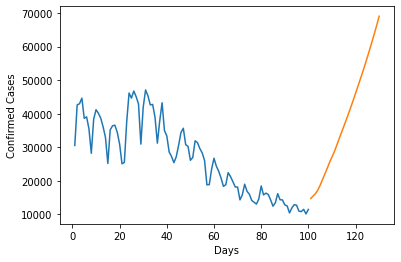

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[310:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.xlabel('Days')
plt.ylabel('Confirmed Cases')

Text(0, 0.5, 'Confirmed Cases')

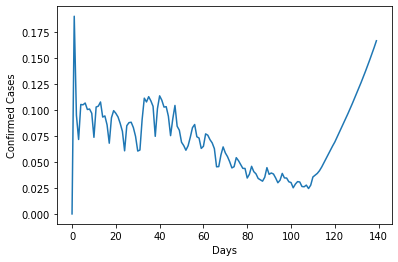

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[300:])
plt.xlabel('Days')
plt.ylabel('Confirmed Cases')

Text(0, 0.5, 'Confirmed Cases')

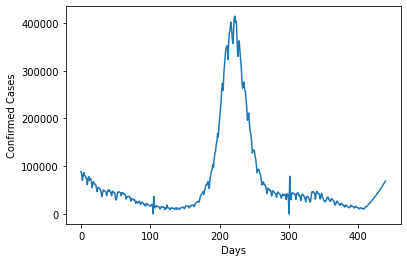

In [ ]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)
plt.xlabel('Days')
plt.ylabel('Confirmed Cases')

# **ConvLSTM1D**

In [ ]:
X_train = X_train.reshape((255, 1, 10, 1))
X_test = X_test.reshape((133, 1, 10, 1))

In [ ]:
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
model4 = Sequential()
model4.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None,10,1)))
model4.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model4.add(TimeDistributed(Flatten()))
model4.add(LSTM(50, activation='relu'))
model4.add(Dense(1))
model4.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, None, 10, 64)     128       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, None, 5, 64)      0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, None, 320)        0         
 tributed)                                                       
                                                                 
 lstm_6 (LSTM)               (None, 50)                74200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                      

In [ ]:
model4.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
8/8 [==============================] - 8s 62ms/step - loss: 0.1036 - val_loss: 0.0027
Epoch 2/100
8/8 [==============================] - 0s 18ms/step - loss: 0.0614 - val_loss: 5.7355e-04
Epoch 3/100
8/8 [==============================] - 0s 13ms/step - loss: 0.0268 - val_loss: 0.0043
Epoch 4/100
8/8 [==============================] - 0s 14ms/step - loss: 0.0124 - val_loss: 0.0105
Epoch 5/100
8/8 [==============================] - 0s 14ms/step - loss: 0.0104 - val_loss: 0.0036
Epoch 6/100
8/8 [==============================] - 0s 14ms/step - loss: 0.0072 - val_loss: 0.0015
Epoch 7/100
8/8 [==============================] - 0s 14ms/step - loss: 0.0065 - val_loss: 0.0015
Epoch 8/100
8/8 [==============================] - 0s 13ms/step - loss: 0.0056 - val_loss: 0.0012
Epoch 9/100
8/8 [==============================] - 0s 14ms/step - loss: 0.0055 - val_loss: 6.8030e-04
Epoch 10/100
8/8 [==============================] - 0s 17ms/step - loss: 0.0053 - val_loss: 5.7137e-04
Epoch 1

# **Predection**

In [ ]:
train_predict=model4.predict(X_train)
test_predict=model4.predict(X_test)
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

# **Performence Matrix**

## **MSE**

In [ ]:
mean_squared_error(y_train,train_predict)

20069335266.38121

In [ ]:
### Test Data RMSE
mean_squared_error(ytest,test_predict)

1170352886.3164485

## **RMSE**

In [ ]:
### Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train,train_predict))

141666.2813318018

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

34210.42072697219

## **MAE**

In [ ]:
mean_absolute_error(y_train,train_predict)

90425.01519151163

In [ ]:
### Test Data MAE
mean_absolute_error(ytest,test_predict)

31993.512503660277

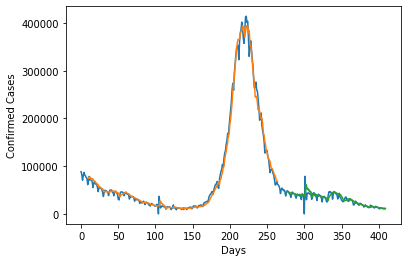

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=10
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))

plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.xlabel('Days')
plt.ylabel('Confirmed Cases')
plt.show()

In [ ]:
x_input=test_data[134:].reshape(1,-1)
x_input.shape

(1, 10)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.030213333075801325,
 0.025164900962847788,
 0.028738157551643214,
 0.031109061585560177,
 0.03073242102620066,
 0.026386568418206222,
 0.026137889074526542,
 0.027712053463644526,
 0.024447835282528706,
 0.027683081112924564]

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=10
i=0
while(i<30):
    
    if(len(temp_input)>10):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1,1, n_steps, 1))
        #print(x_input)
        yhat = model4.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1,1, n_steps,1))
        yhat = model4.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.02769605]
11
1 day input [0.0251649  0.02873816 0.03110906 0.03073242 0.02638657 0.02613789
 0.02771205 0.02444784 0.02768308 0.02769605]
1 day output [[0.02720116]]
2 day input [0.02873816 0.03110906 0.03073242 0.02638657 0.02613789 0.02771205
 0.02444784 0.02768308 0.02769605 0.02720116]
2 day output [[0.02718507]]
3 day input [0.03110906 0.03073242 0.02638657 0.02613789 0.02771205 0.02444784
 0.02768308 0.02769605 0.02720116 0.02718507]
3 day output [[0.02671475]]
4 day input [0.03073242 0.02638657 0.02613789 0.02771205 0.02444784 0.02768308
 0.02769605 0.02720116 0.02718507 0.02671475]
4 day output [[0.02683136]]
5 day input [0.02638657 0.02613789 0.02771205 0.02444784 0.02768308 0.02769605
 0.02720116 0.02718507 0.02671475 0.02683136]
5 day output [[0.02690063]]
6 day input [0.02613789 0.02771205 0.02444784 0.02768308 0.02769605 0.02720116
 0.02718507 0.02671475 0.02683136 0.02690063]
6 day output [[0.02683441]]
7 day input [0.02771205 0.02444784 0.02768308 0.02769605 0.0272011

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131) 

Text(0, 0.5, 'Confirmed Cases')

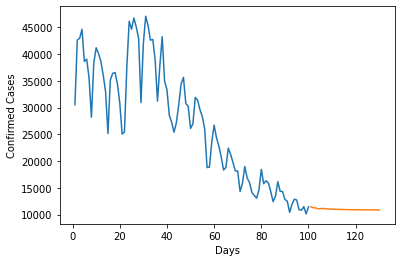

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[310:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.xlabel('Days')
plt.ylabel('Confirmed Cases')

Text(0, 0.5, 'Confirmed Cases')

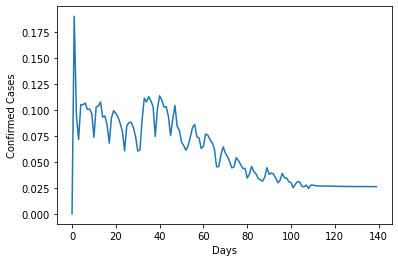

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[300:])
plt.xlabel('Days')
plt.ylabel('Confirmed Cases')

Text(0, 0.5, 'Confirmed Cases')

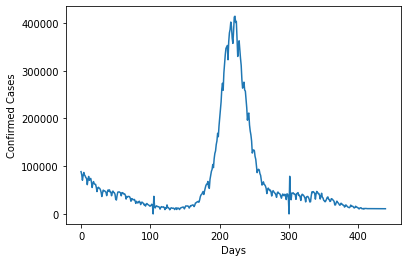

In [ ]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)
plt.xlabel('Days')
plt.ylabel('Confirmed Cases')